# EDA for Lending club case study

### Importing Required Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Display settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

### Data Understanding :

In [2]:
# reading the loan csv file
loan=pd.read_csv('loan.csv')

In [3]:
# checking shape of the loan file
loan.shape

(39717, 111)

In [4]:
# checking first few records
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
#checking last few records
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,0.0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,NaN,Jun-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,0.0,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,NaN,Jul-10,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,0.0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,0.0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,NaN,Jun-07,NaN,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
# describing numerical attributes 
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

- A data dictionary file is also been provided along with the loan data. This file gives a brief describtion about all the columns of the loan transaction file.

In [7]:
# reading all data dictionary values
data_dict = pd.read_excel('Data_Dictionary.xlsx')
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


### Data Cleaning and Manipulation :

In [8]:
#Finding percentage of missing value for each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [9]:
#Assuming that columns having more than 60% missing values cannot contribute to our analysis
missing_values_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 60]
print(missing_values_columns)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [10]:
#Dropping above columns as these have more than 60% missing values
loan = loan.drop(missing_values_columns, axis=1)
print(loan.shape)

(39717, 54)


- We have Customer Behaviour variables/columns which are irrevelent w.r.t our analysis as customer behaviour variables are not available at time of loan application and thus they cannot be used as predictors for credit approval.

**List of post loan approval columns:**
- delinq_2yrs
- earliest_cr_line
- inq_last_6mths
- open_acc
- pub_rec
- revol_bal
- revol_util
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d
- application_type
- acc_now_delinq
- chargeoff_within_12_mths

Also there are some columns such as "id", "member_id", "url", "zip_code","desc" which doesnot contribute to the loan defaulting analysis in any way due to irrelevant information. Therefore removing them.

1.**id:** is a distinct number given to the loan, does not contribute to analysis.

2.**member_id:** is a random number given to the member, does not contribute to analysis.

3.**url:** is a URL for LC page for corresponding to each memberid, nothing to do with loan default.

4.**zip_code:** first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not    contribute to analysis.

5.**desc:** has description which has text data not required for our analysis.

In [11]:
#The above mentioned columns are not useful to find out driving factors of loan defaulting before approving loan.
#Therefore dropping these columns

loan = loan.drop(['delinq_2yrs', 'earliest_cr_line','inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                  'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','application_type','id', 'member_id',
                                 'url', 'desc', 'zip_code','acc_now_delinq','chargeoff_within_12_mths'
                 ], axis = 1)

In [12]:
#checking shape of dataset again after dropping above columns
loan.shape

(39717, 26)

- There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.

These columns are:
- 1.**pymnt_plan:** value for entire dataset is 'n', therefore can be removed.

- 2.**initial_list_status:** value for entire dataset is 'f' out of the possible values, therefore can be removed.

- 3.**policy_code:** value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.

- 4.**application_type:** value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.

- 5.**acc_now_delinq:** value for entire dataset is '0', therefore can be removed.

- 6.**delinq_amnt:** value for entire dataset is '0', therefore can be removed.

- 7.**collections_12_mths_ex_med:** value for entire dataset is '0' & NaN, therefore can be removed.

- 8.**tax_liens:** value for entire dataset is '0' & NaN, therefore can be removed.

In [13]:
#Checking again if there are any cloumns left with less than 2 unique values
loan.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
title                         19615
addr_state                       50
dti                            2868
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
delinq_amnt                       1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

In [14]:
#dropping columns having only one unique value
loan = loan.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','tax_liens',
                  'delinq_amnt'] ,axis= 1)
loan.shape

(39717, 20)

- For the given case study, "Current" status rows will be ignored
Current - These customers, the loan is currently in progress and cannot contribute to conclusive evidence if the customer will default of pay in future .These applicant are not labelled as 'defaulted'.

In [15]:
#removing all the rows where loan_status is "Current" as this is not relevant to our analysis
loan = loan[loan['loan_status']!= 'Current']

In [16]:
# Final shape of our dataset after cleaning
loan.shape

(38577, 20)

### Datatype Conversion:

In [17]:
#checking datatypes for each column
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

In [18]:
#removing % and changing int rate to float
loan.int_rate=loan.int_rate.astype(str).str.rstrip('%').astype('float')

#converting columns to numeric
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

# Converting the column issue_d from string object to DateTime
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')

In [19]:
# Converting emp_length to integer values
# Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
loan['emp_length'] = loan['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

#### Imputing vs Dropping Columns

- Evaluating the percentage of rows with blank values for columns "emp_length" & "pub_rec_bankruptcies"
**Assumption**: If blank values percentage for column is less than 5%, we will drop that column.

In [20]:
# checking rows before imputing/dropping of blank columns
rows_before = len(loan)

In [21]:
# Identify columns who have blank values and what percentage of total values are there blanks. 
# These values may need to be imputed
print('emp_length blank rows', round((loan['emp_length'].isna().sum()/len(loan)*100),2) ,"%")
print('pub_rec_bankruptcies blank rows', round((loan['pub_rec_bankruptcies'].isna().sum()/len(loan)*100),2),"%", "\n")

emp_length blank rows 2.68 %
pub_rec_bankruptcies blank rows 1.81 % 



In [22]:
# Dropping rows with empty values in this scenario
# Since the percent of rows is very small, dropping the rows instead of imputing them
loan = loan[loan['emp_length'].notna()]
loan = loan[loan['pub_rec_bankruptcies'].notna()]

In [23]:
# Print the dimensions of the dataframe after dropping rows
rows_after = len(loan)
print("Number of rows dropped = ,", (rows_before - rows_after))
print("Percentage of rows dropped = ", round((rows_before - rows_after)/rows_before*100,2),"%")
print(loan.shape)

Number of rows dropped = , 1730
Percentage of rows dropped =  4.48 %
(36847, 20)


#### Derived Columns

In [24]:
# Adding additional column for Year and Month for analysis extrating Year and Month from issue_d
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year
loan.shape

(36847, 22)

In [25]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year'],
      dtype='object')

### Outliers Treatment

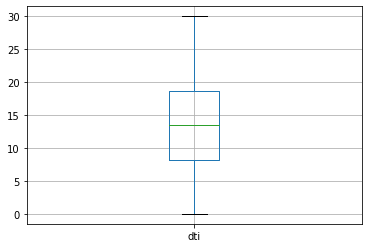

In [26]:
# For dti Column
loan.boxplot(column=['dti']);

Clearly there are no outlier present for dti.

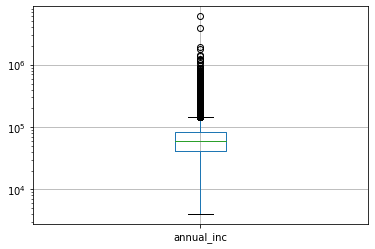

In [27]:
#checking if there are any outliers for Annual income column
plt.yscale('log')
loan.boxplot(column=['annual_inc']);

We can see presence of outliers for annual_inc.

In [28]:
#removing rows from annual_inc after 99.5 percentile
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.995)]
loan["annual_inc"].describe()

count     36638.000000
mean      66808.346072
std       37278.204572
min        4000.000000
25%       41000.000000
50%       59800.000000
75%       82000.000000
max      294000.000000
Name: annual_inc, dtype: float64

Max value is 294000 which is approx 4 times more than mean value, so we will remove the outliers from Annual Income. Removing Outliers (values from 99 to 100%).

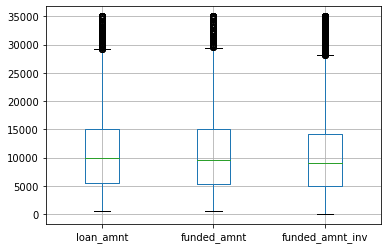

In [29]:
#checking if there are any outliers in the columns containing numerical values
loan.boxplot(column=['loan_amnt','funded_amnt','funded_amnt_inv']);

Let's check the quantile info for these columns and take an appropriate action for ouliers treatment.

In [30]:
# Quantile info for loan_amnt
loan.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

In [31]:
# Quantile info for funded_amnt
loan.funded_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    27000.0
0.975    28625.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: funded_amnt, dtype: float64

In [32]:
# Quantile info for funded_amnt_inv
loan.funded_amnt_inv.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    14250.000000
0.900    20000.000000
0.950    24525.000000
0.970    25814.642053
0.975    27975.000000
0.980    29809.807082
0.990    34649.020406
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

- Though there are some values far from distribution, the distribution is pretty continous and there is no need to remove outliers / extreme values for these above columns.

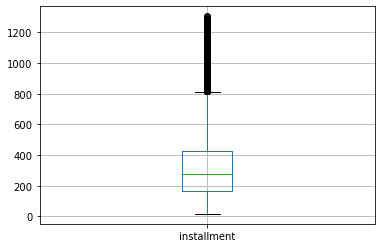

In [33]:
#checking outliers for installment
loan.boxplot(column=['installment']);

In [34]:
#removing rows from "installment" after 99.5 percentile
loan = loan[loan["installment"] < loan["installment"].quantile(0.995)]
loan["installment"].describe()

count    36454.000000
mean       319.153380
std        199.263603
min         16.080000
25%        167.060000
50%        278.235000
75%        423.105000
max       1061.990000
Name: installment, dtype: float64

Max value is 1061 which is approx 3 times more than mean value, so we will remove the outliers from Installment. Removing Outliers (values from 99 to 100%).

### Data Analysis :

### 1.Univariate Analysis:

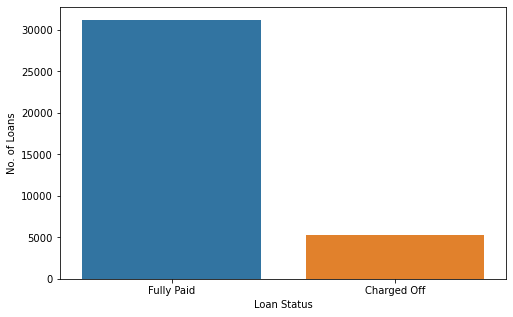

In [35]:
#count plot for loan status
plt.figure(figsize=(8,5))
ax = sns.countplot(x="loan_status", data=loan)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

**Inference:**
- Max. no. of the loans(more than 30000) are Fully paid.
- Around 5000 loans are charged off.
- About 14% of loan are having status as defaulters.

In [36]:
#checking value for fully paid and charged off
loan["loan_status"].value_counts()

Fully Paid     31213
Charged Off     5241
Name: loan_status, dtype: int64

#### We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots.

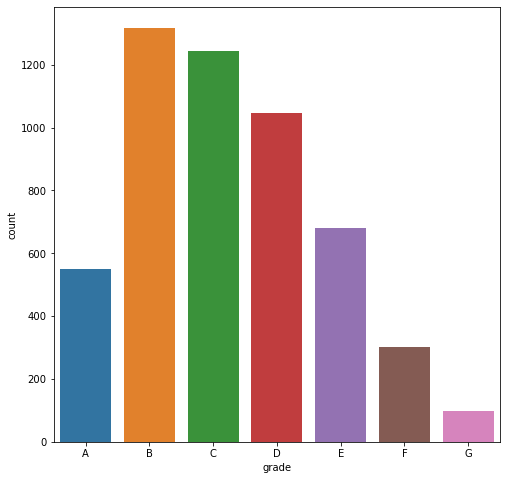

In [37]:
#count plot for grade
plt.figure(figsize=(8,8))
ax=sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

**Inference:** Most of the loans are of type B,C & D.

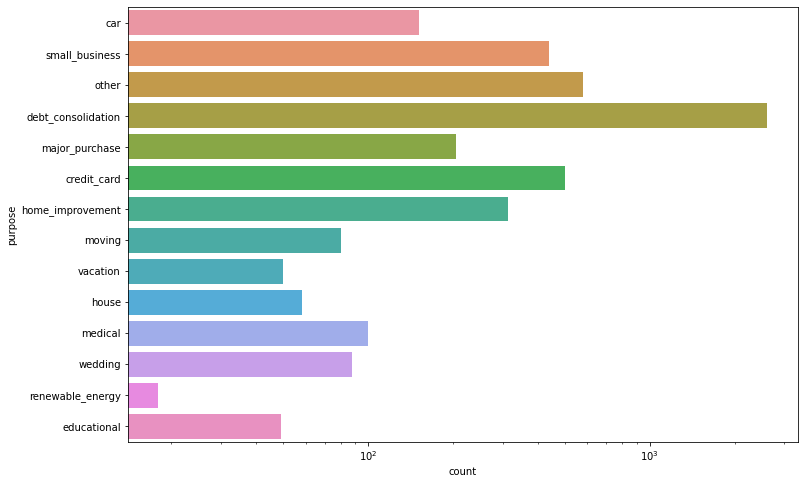

In [38]:
#count plot for purpose
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])
plt.show()

**Inference:** Most of the loans issued/accepted were for debt consolidation.

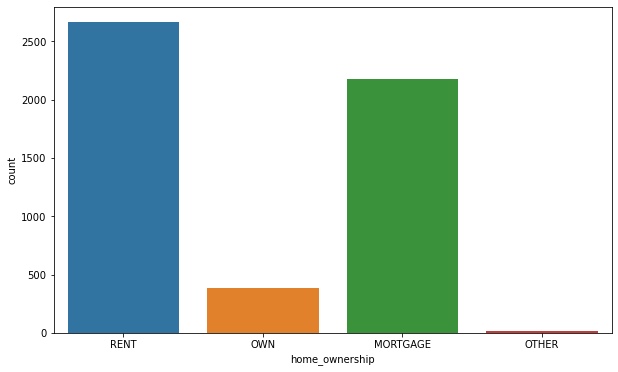

In [39]:
#count plot for home_ownership
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

**Inference :** Max no. of loans are charged off for people who are living on rent.

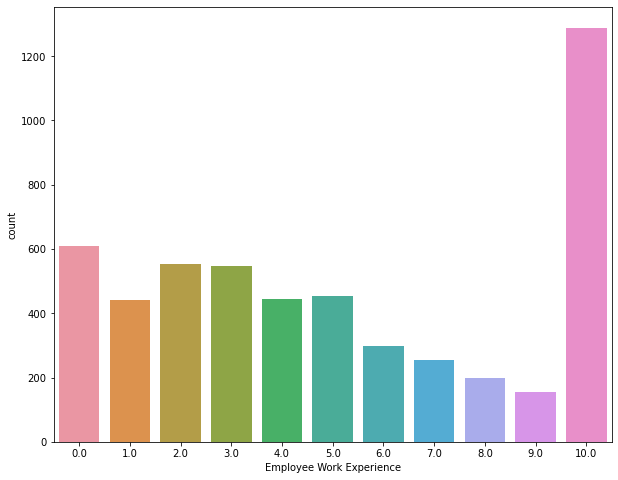

In [40]:
#count plot for emp_length_years
plt.figure(figsize=(10,8))
sns.countplot(x='emp_length', data=loan[loan['loan_status']=='Charged Off'])
plt.xlabel('Employee Work Experience')
plt.show()

**Inference:** Max no. of loans are charged off for employee having more than 10 years of work experience.

### - Converting numerical variable to Categorical using bins.

In [41]:
#creating bins for int_rate,loan_amnt,funded_amnt_inv,installment,dti
loan['int_rate_cat'] = pd.cut(loan['int_rate'], bins=4,precision =0,labels=['5%-10%','10%-15%','15%-20%','20%-25%'])
loan['installment_cat'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_cat'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) 
loan['loan_amnt_cat'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_cat'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-7','7-14','14-21','21-28','28-35'])
loan['annual_inc_cat'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['2k-30k','30k-60k','60k-90k','90k-120k','120k-150k'])                                                                   

### - Analysing derived categorical columns with respect to the charged off loans status.

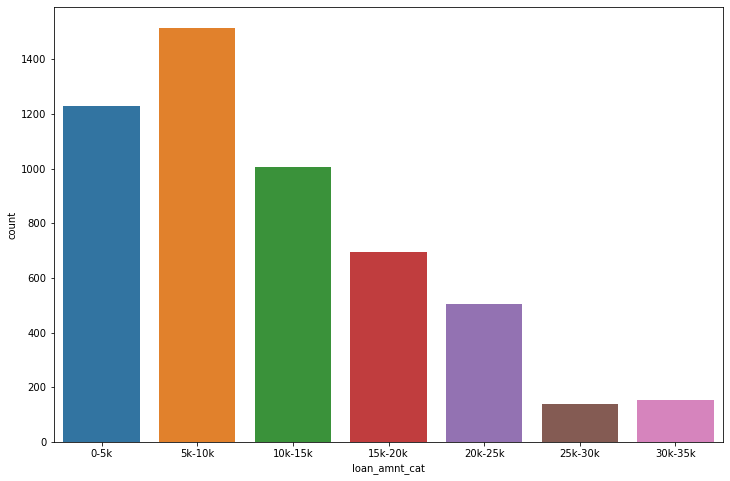

In [42]:
# Countplot for loan amount categorical variable
plt.figure(figsize=(12,8))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_cat', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

**Inference :**
- Chances of loan defaulting is high for lower loan amount.
- probability of loan defaulting is less for higher loan amount.

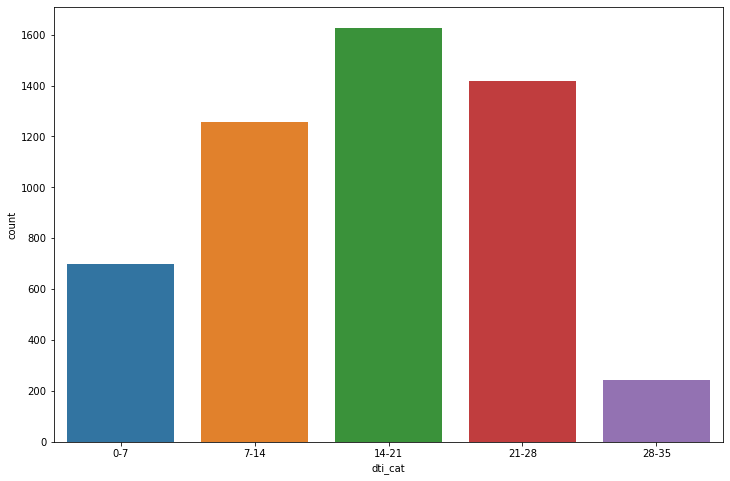

In [43]:
# Countplot for dti(debt to income) categorical variable
plt.figure(figsize=(12,8))
sns.countplot(x='dti_cat', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

**Inference:**
- dti:Debt to income ratio is between 14-21

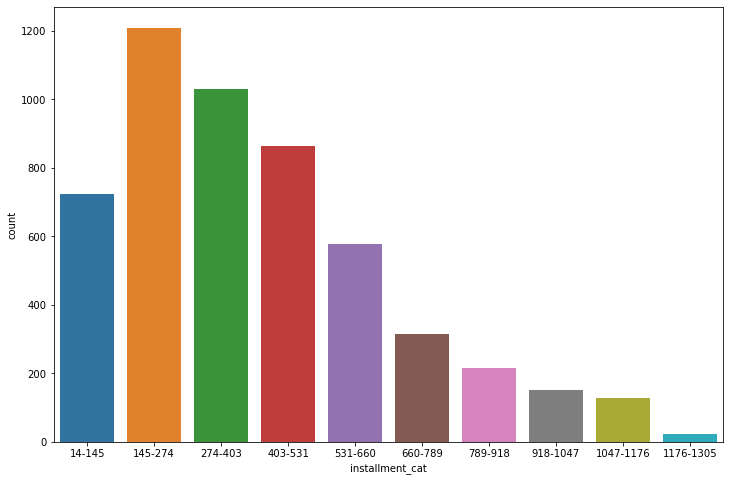

In [44]:
# Countplot for installment categorical variable
plt.figure(figsize=(12,8))
ax.set_yscale('log')
sns.countplot(x='installment_cat', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

**Inference :** 
- Probability of defaulting is more when monthly installments are between 145-274.

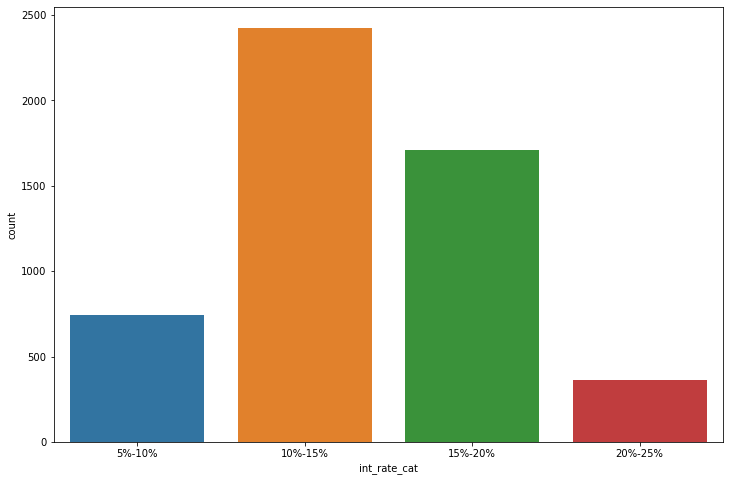

In [45]:
# Countplot for interest rate categorical variable
plt.figure(figsize=(12,8))
ax.set_yscale('log')
sns.countplot(x='int_rate_cat', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

**Inference:**
- Chances of defaulting is more when interest rate is between 10-15%.

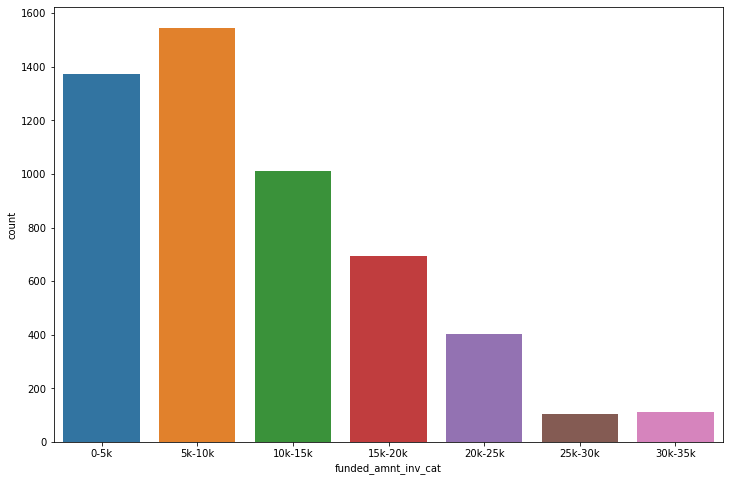

In [46]:
# Countplot for funded amount by investor categorical variable
plt.figure(figsize=(12,8))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_cat', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

**Inference:**
- Chances of loan defaulting is more if funded amount by investor is between 5k-10k

### 2.Segmented Univariate Analysis:

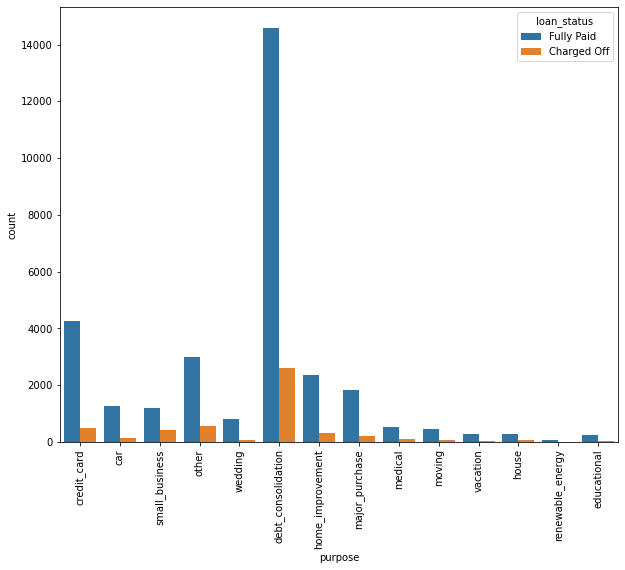

In [48]:
#countplot for purpose w.r.t loan_status
plt.figure(figsize=(10,8))
sns.countplot(x='purpose', hue="loan_status", data=loan)
plt.xticks(rotation=90)
plt.show()

**Inference :**
- Majority of loan has been given for the debt consolidation purpose and has been fully paid.

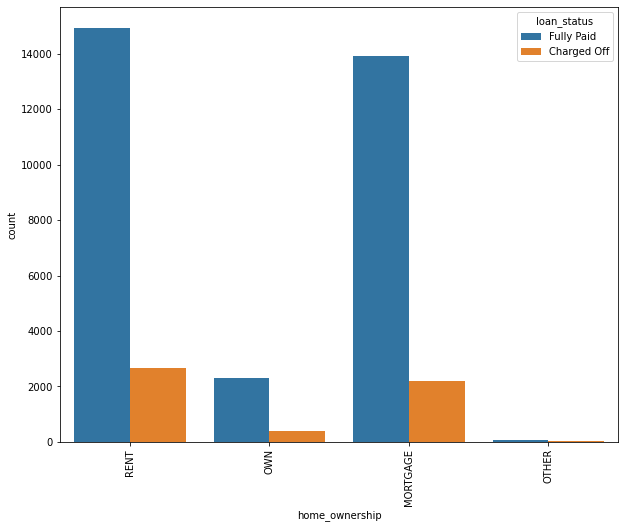

In [49]:
# Countplot for home ownership vs loan status
plt.figure(figsize=(10,8))
sns.countplot(x='home_ownership',hue='loan_status', data=loan)
plt.xticks(rotation=90)
plt.show()

**Inference :**
- There is a more probability of defaulting when applicants having house_ownership as 'RENT'
- Lending club accept less no. of loan requests from applicants who own a house.

#### Loan status analysis month & year wise

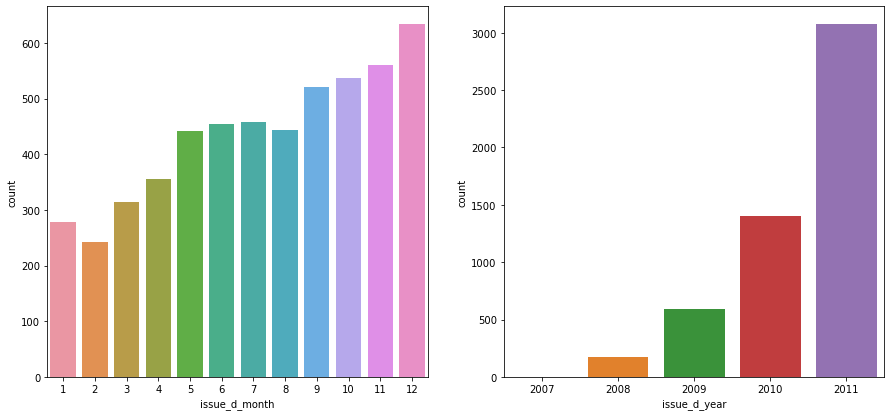

In [50]:
# Countplot for month & year wise of charged off
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_month', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_d_year', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

**Inference :**
- Maximum no. of defaults occured when the loan was sanctioned/issued in December month i.e Late months of an year   indicated the high possibility of defaulting.
- Loan issued & No. of defaulters are highest for year 2011 as compared to other years.
- Requirement of loans are increasing by each year.

#### Loan Status vs Loan Amount of charged off loans

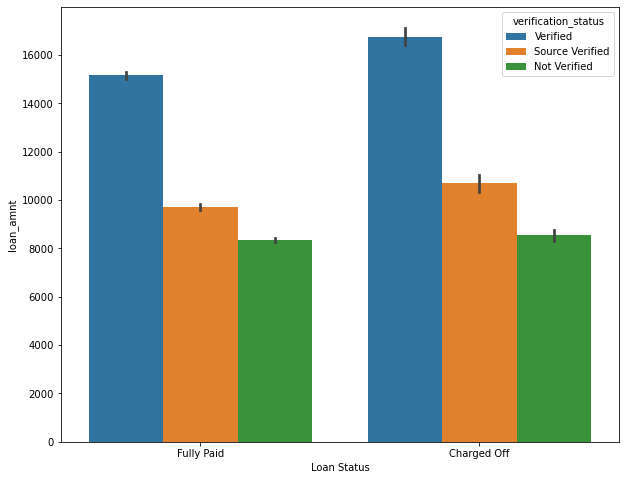

In [51]:
# Barplot for  Loan Status vs Loan Amount
plt.figure(figsize=(10,8))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=loan)
plt.xlabel("Loan Status")
plt.show()

**Inference :**
- Max no. of loans are charged off when verification status is 'Verified'.

#### Extracting subgrade integer level value from sub_grade variable

In [52]:
#Extracting only integer value from sub grade variable
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

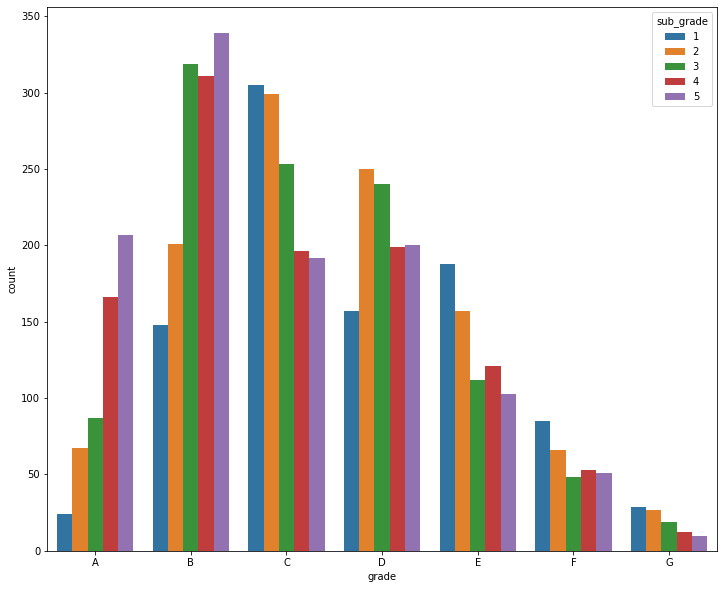

In [53]:
# Countplot for subgrade variable
plt.figure(figsize=(12,10))
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , 
hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])
plt.show()

**Inference :**
- For Subgrade 'B5' level tendency of loan defaulting is high.

#### Term-wise distribution of charged-off and fully paid loans vs loan amount

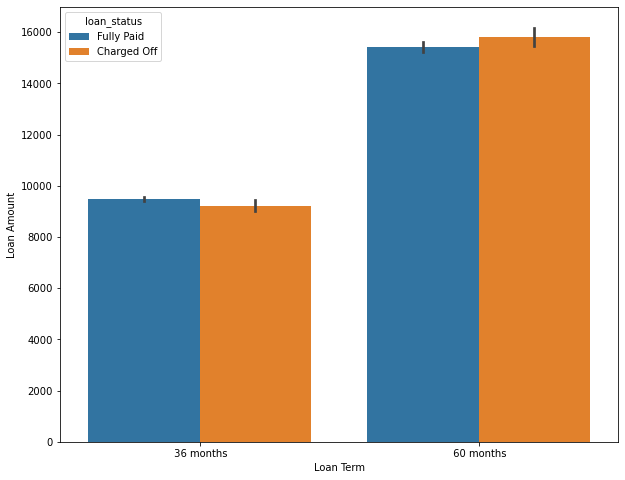

In [54]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=loan)
ax.set(xlabel='Loan Term', ylabel='Loan Amount')
plt.show()

**Inference :**
- Loan amount is similar for both the terms for both loan status.
- Loan amount is higher for the 60 month term.

#### Term wise Distribution of interest rate

<Figure size 432x576 with 0 Axes>

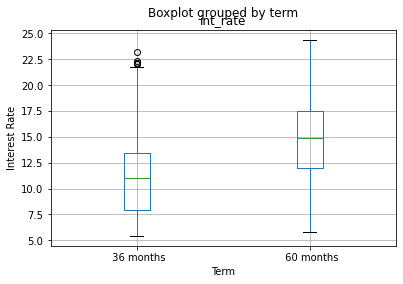

In [55]:
plt.figure(figsize=(6,8))
ax = loan.boxplot(column='int_rate', by='term')
ax.set(xlabel='Term', ylabel='Interest Rate')
plt.show()

**Inference :**
- The interest rates are higher for 60 month term.

### 3.Bivariate Analysis:

### Analysing Loan amount variation with other columns of dataset

- **Loan amount vs Grade**

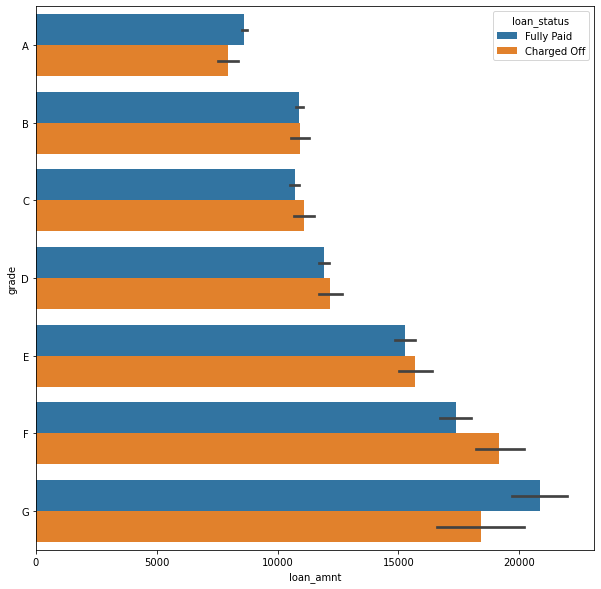

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

**Inference :**
- Loan amount increases with decrease in grade
- Charged off is highest for Grade F

- **Loan amount vs Loan purpose**

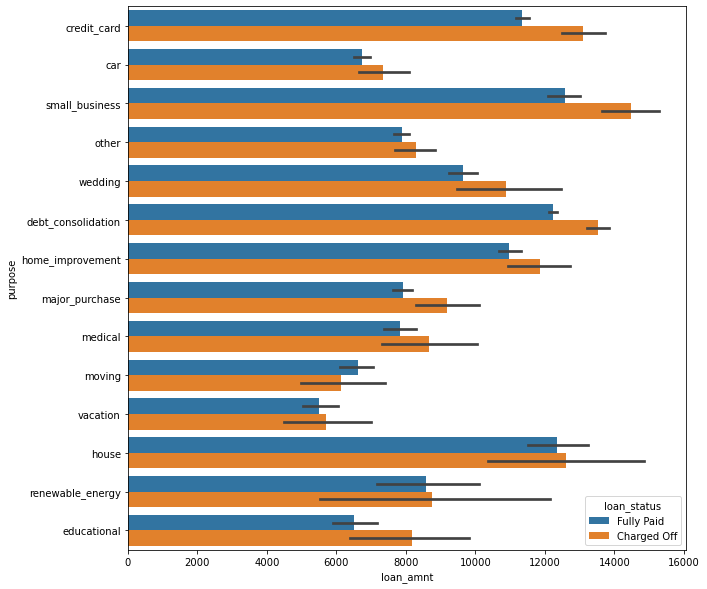

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()

**Inference :**
- Applicants who have taken a loan for small business the loan amount is greater than 14k.

- **Loan Amount vs Interest Rate**

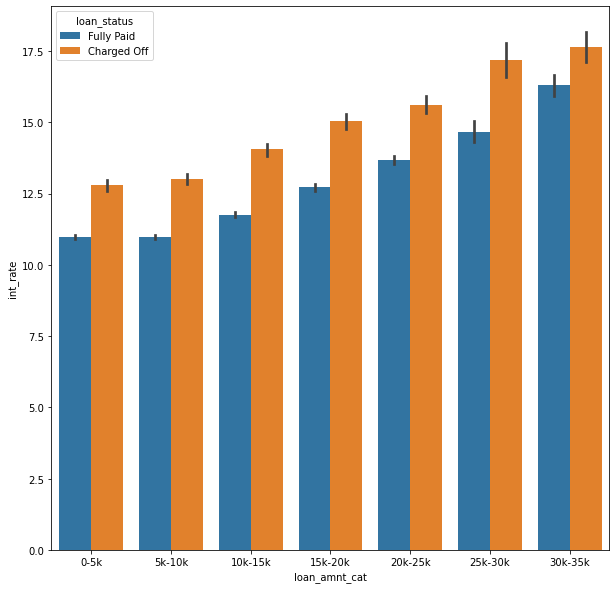

In [58]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='loan_amnt_cat', y='int_rate', hue ='loan_status')
plt.show()

**Inference :**
- Applicants who have taken a loan in the range 30k - 35k are charged interest rate of 15%-17.5%

- **Loan amount w.r.t to Employee working history & verification status**

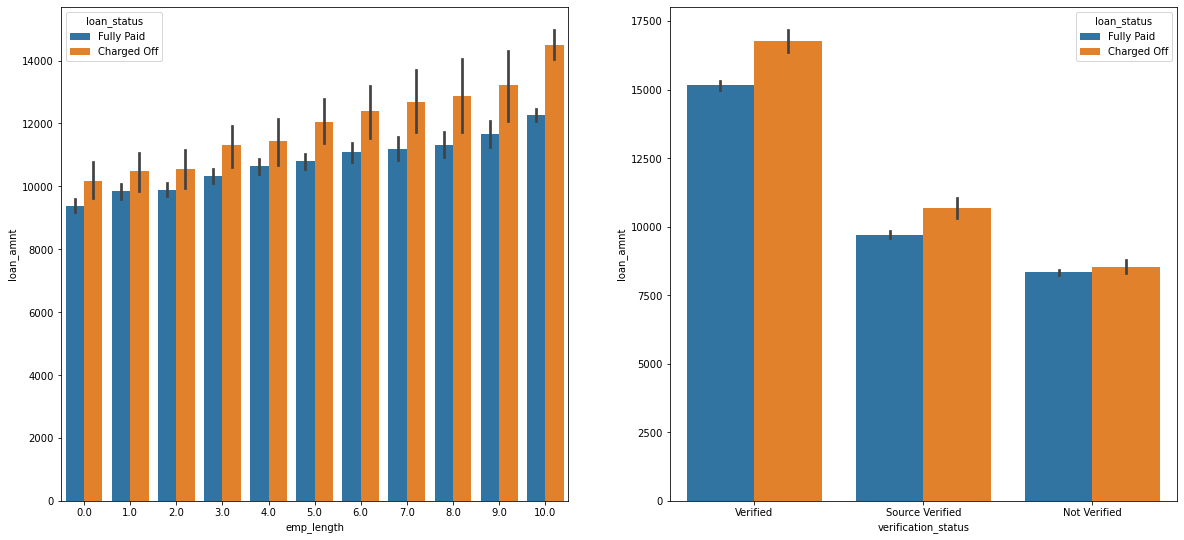

In [59]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan,y='loan_amnt', x='emp_length', hue ='loan_status')
plt.subplot(222)
sns.barplot(data =loan,y='loan_amnt', x='verification_status', hue ='loan_status')
plt.show()

**Inference :**
- Applicant with longer working history got the loan approved for a higher amount.
- Verified loan applications tend to have higher loan amount. Which might indicate that the firms are first  verifying the loans with higher values.
- chances of loan defaulting is high when employment length is 10yrs and loan amount is 12k-14k
- Probability of loan defaulting is more when the loan is verified and loan amount is above 15k

### Analysing annual income variation with other columns of dataset

- **Annual income vs int_rate**

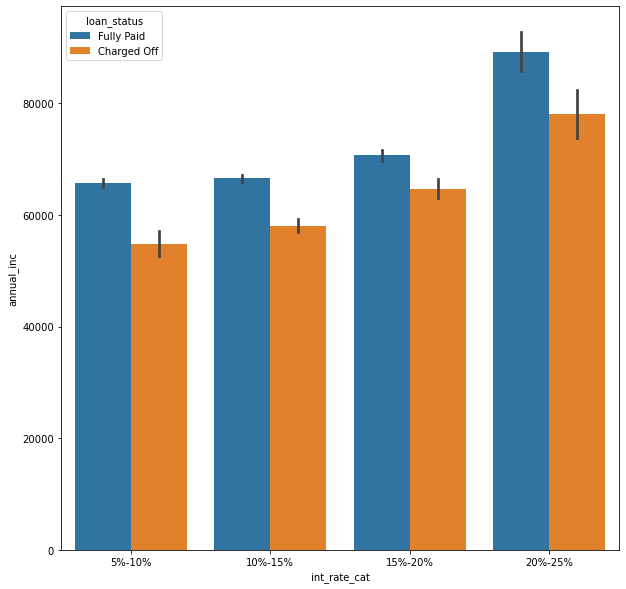

In [60]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='int_rate_cat', y='annual_inc', hue ='loan_status')
plt.show()

**Inference :**
- Probability of loan defaulting is high for applicants who receive interest at the rate of 20%-25% and have an income of 70k-80k

- **Annual Income vs Loan amount**

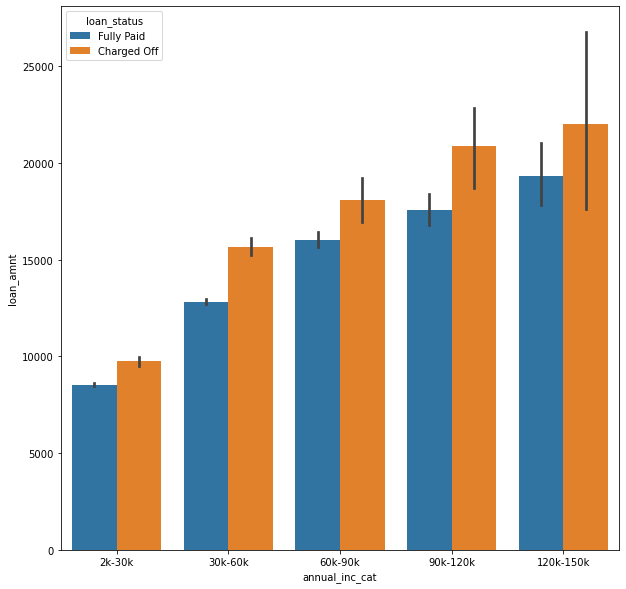

In [61]:
plt.figure(figsize=(10,10))
sns.barplot(x = "annual_inc_cat", y = "loan_amnt", hue = 'loan_status', data = loan)
plt.show()

**Inference :**
- Across all the income category,loan amount is higher for charged off loans

- **Annual income vs loan purpose**

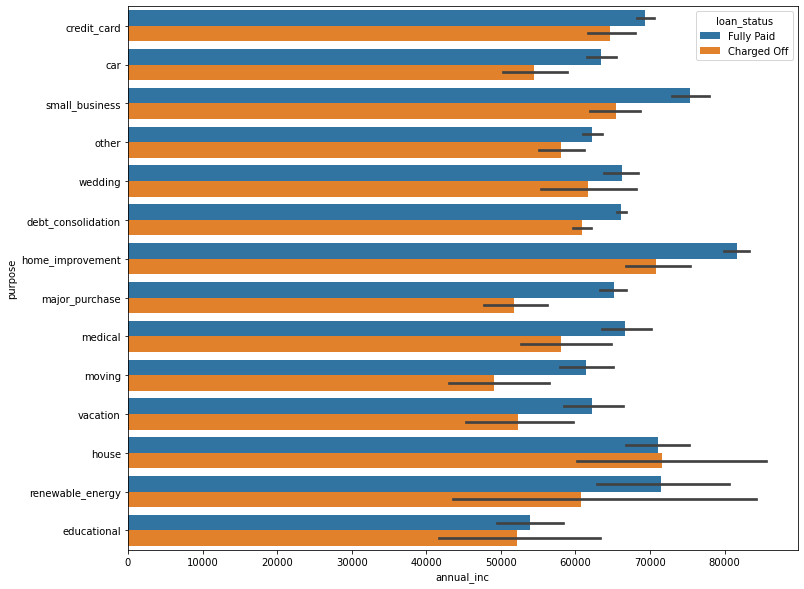

In [62]:
plt.figure(figsize=(12,10))
sns.barplot(data =loan,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

**Inference :**
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"
- Chances of loan defaulting is high for applicants taking loan for 'home improvement' and have income of 70k -80k

- **Annual income vs home ownership**

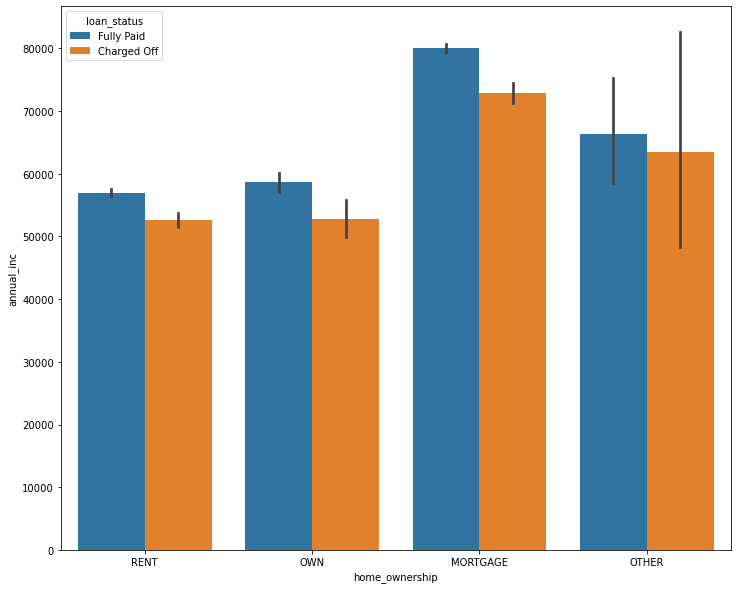

In [63]:
plt.figure(figsize=(12,10))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status')
plt.show()

**Inference :**
- There is high probabilty of loan defaulting when applicants whose home ownership is 'MORTGAGE have income of 70-80k.

### Applicant's state vs Loan status

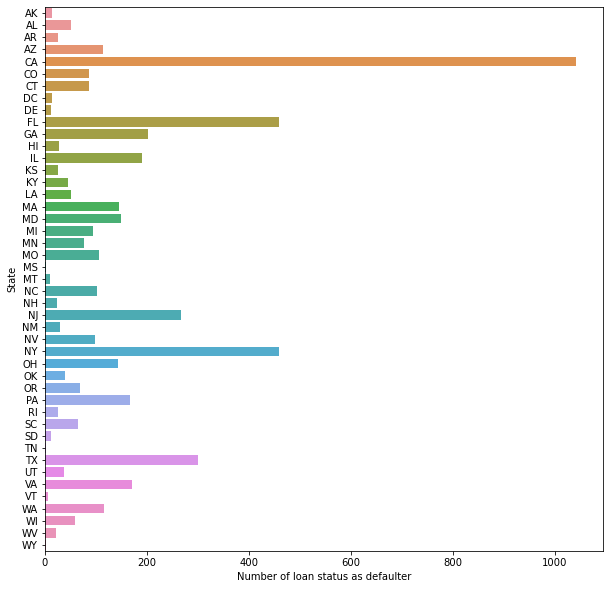

In [64]:
#Barplot for addr_state 
loan_state = loan[loan['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=loan_state)
plt.xlabel('Number of loan status as defaulter')
plt.ylabel('State')
plt.show()

**Inference :**
- Applicants from the state CA are having high probability to be default.

## Correlation Matrix:

- Checking correlation between the variables/columns of dataset

In [65]:
#Checking correlation
loan_correlation = loan.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_length,annual_inc,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year
loan_amnt,1.000000,0.980628,0.949236,0.299044,0.928432,0.029863,0.149438,0.405792,0.068937,-0.029393,0.050900,0.105370
funded_amnt,0.980628,1.000000,0.969589,0.304193,0.955678,0.023052,0.149344,0.401162,0.069143,-0.030275,0.040437,0.118548
funded_amnt_inv,0.949236,0.969589,1.000000,0.294447,0.918896,0.023746,0.156968,0.386834,0.072258,-0.035421,0.056151,0.208906
int_rate,0.299044,0.304193,0.294447,1.000000,0.276291,-0.034270,-0.003048,0.063613,0.109188,0.084079,0.023653,0.023022
installment,0.928432,0.955678,0.918896,0.276291,1.000000,0.016776,0.122651,0.403625,0.059827,-0.026617,0.028921,0.046087
sub_grade,0.029863,0.023052,0.023746,-0.034270,0.016776,1.000000,-0.012618,0.009402,0.014670,0.003376,-0.015790,-0.044668
emp_length,0.149438,0.149344,0.156968,-0.003048,0.122651,-0.012618,1.000000,0.167687,0.051535,0.063023,0.022105,0.111178
annual_inc,0.405792,0.401162,0.386834,0.063613,0.403625,0.009402,0.167687,1.000000,-0.120743,-0.013950,0.011517,0.031504
dti,0.068937,0.069143,0.072258,0.109188,0.059827,0.014670,0.051535,-0.120743,1.000000,0.006574,0.009396,0.080908
pub_rec_bankruptcies,-0.029393,-0.030275,-0.035421,0.084079,-0.026617,0.003376,0.063023,-0.013950,0.006574,1.000000,-0.022421,-0.002060


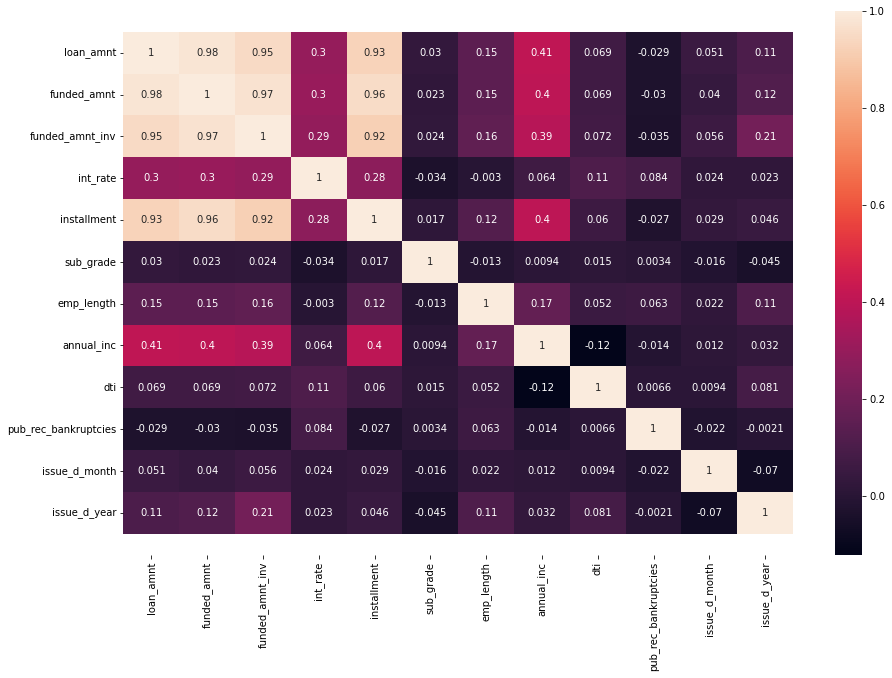

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

**Inference :**
- Annual Income is negatively correlated with DTI.
- Loan Amount, Funded Amount, Funded Amount invested and installment are highly correlated with each other.

## Recommendations:

1. Chances of loan being charged off is high when loan amount is high therefore Lending club should consider accepting loans of  lower amount.                    


2. Lending Club should accept more loans of grade A and B and should be cautious of loans falling in grades E,F and G.


3. Lending Club should accept more loans from applicants whose annual income is greater than 100k as their probability of charge off is less.


4. Lending Club should accept more loans for term of 36 months as the of charged off loans is less and the number of loan applicants are more  for this term.


5. Year end months especially 'December' are quite critical as most of the loans are either fully paid or charged off at that time.


6. Lending Club should consider accepting more loans where interest rate is less than 10% as their probability of charge off is minimum.


7. Lending Club should do extra scrutiny for the applicants belonging to CA state, as tendency to default is high.


8. Lending Club should accept more loans for the purpose of Weddings, major purchase, car and credit card.


9. Lending Club should check thoroughly when purpose is debt consolidation as it has high tendency to default.


9. Lending Club should consider accepting more loans from people who owns a house.


10. Lending Club business is increasing every year as more number of loans are getting accepted as well as more  loans are getting charged off therefore they should expand their business more as demand for loans is high.